### Evaluation of PT100 and OMB measurements at the Blindern station



In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


##### Load OMB from testfield winter 2023/2024


##### from: 2023-12-06T15; to : 2024-01-08T07: all its thermistors in the small radiation shield together with the PT100 rs1
##### after 2024-01-13T08, the thermistors were moved in the following configuration:
##### around 2024-02-25 the thermistors were used for tests with the Steinar koffert 

    
    
    

In [3]:
OMBraw = xr.open_mfdataset('data/KVS-35_blindern_data.nc')  

OMBtime  = OMBraw.time_temp[0,:]

startdate = np.datetime64('2024-01-14','s') 
enddate   = np.datetime64('2024-02-20','s') 

t1 = np.argmin(np.abs(OMBtime.values-startdate))
t2 = np.argmin(np.abs(OMBtime.values-enddate))

OMBtime  = OMBtime[t1:t2]        
OMBtemp1 = OMBraw.temp_1m_calibrated.values[0,t1:t2];         legend1 = 'alu no shield'   # 'aluminium sensor outside of shield'
OMBtemp2 = OMBraw.temp_10cm_calibrated.values[0,t1:t2];       legend2 = 'black in shield' # "inside shield naked sensor"
OMBtemp3 = OMBraw.temp_snowice_calibrated.values[0,t1:t2];    legend3 = 'black no shield' 
OMBtemp4 = OMBraw.temp_snowsurface_calibrated.values[0,t1:t2];legend4 = 'alu in shield'   #

##### LOAD MET Station PT 100 data and 
##### incoming solar radiation from one of the sensors, both are very similar 

In [4]:
import pandas as pd

df = pd.read_csv('data/all_data_blindern_20240113_20240315/blindern_data_3205059_34_PT100_rs1_test_KVS-35_radiationshield.csv')  

PT100time = pd.to_datetime(df['Timestamp']).values
PT100temp = df.Value.values

# Radiation Sensor Incoming Solar
df = pd.read_csv('data/all_data_blindern_20240113_20240315/blindern_data_0_15_C_QSI_test_KVS-35_radiationshield.csv')  

QSItime = pd.to_datetime(df['Timestamp']).values
QSI     = df.Value.values

df = pd.read_csv('data/all_data_blindern_20240113_20240315/blindern_data_0_4_A_QSI_test_KVS-35_radiationshield.csv')

QSIBtime = pd.to_datetime(df['Timestamp']).values
QSIB     = df.Value.values

(0.0, 200.0)

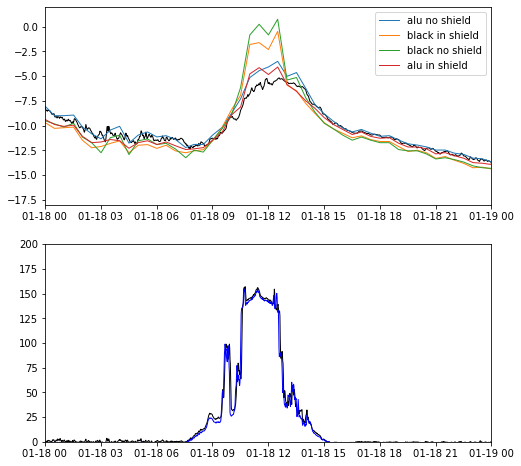

In [13]:
fig, ax = plt.subplots(figsize=(8, 8),nrows=2,ncols=1)

ax[0].plot(PT100time,PT100temp,linewidth=1,color='black')

ax[0].plot(OMBtime,OMBtemp1,linewidth=1,color='C0',label=legend1)
ax[0].plot(OMBtime,OMBtemp2,linewidth=1,color='C1',label=legend2)
ax[0].plot(OMBtime,OMBtemp3,linewidth=1,color='C2',label=legend3)
ax[0].plot(OMBtime,OMBtemp4,linewidth=1,color='C3',label=legend4)

ax[0].set_xlim([datetime.date(2024, 1, 18), datetime.date(2024, 1, 19)])
ax[0].set_ylim([-18, 2])
ax[0].legend()
ax[1].plot(QSItime,QSI,linewidth=1,color='black')
ax[1].plot(QSIBtime,QSIB,linewidth=1,color='blue')

ax[1].set_xlim([datetime.date(2024, 1, 18), datetime.date(2024, 1, 19)])
ax[1].set_ylim([0, 200])


### Co-locate time axes

In [6]:
PT100tempc=np.zeros(len(OMBtime))
QSIc=np.zeros(len(OMBtime))

for t in range(len(OMBtime)):
    mx = np.argmin(np.abs(OMBtime[t].values-PT100time))
    
    if (np.abs(OMBtime[t].values-PT100time[mx]).astype('timedelta64[m]')) < 5:
        #print(PT100time[mx],OMBtime[t].values,(OMBtime[t].values-PT100time[mx]).astype('timedelta64[m]'))
        PT100tempc[t] = PT100temp[mx]
    else:
        PT100tempc[t] = np.nan
        
    mx = np.argmin(np.abs(OMBtime[t].values-QSItime))
    
    if (np.abs(OMBtime[t].values-QSItime[mx]).astype('timedelta64[m]')) < 5:
        QSIc[t] = QSI[mx]
    else:
        QSIc[t] = np.nan
        
        

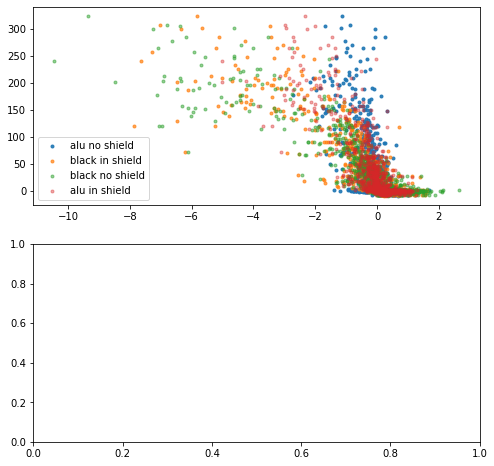

In [9]:
fig, ax = plt.subplots(figsize=(8, 8),nrows=2,ncols=1)


ax[0].scatter(PT100tempc-OMBtemp1,QSIc,marker='.',color='C0',alpha=0.9,label=legend1)
ax[0].scatter(PT100tempc-OMBtemp2,QSIc,marker='.',color='C1',alpha=0.7,label=legend2)
ax[0].scatter(PT100tempc-OMBtemp3,QSIc,marker='.',color='C2',alpha=0.5,label=legend3)
ax[0].scatter(PT100tempc-OMBtemp4,QSIc,marker='.',color='C3',alpha=0.4,label=legend4)
ax[0].legend()


In [8]:
QSItime

array(['2024-01-13T00:00:00.000000000', '2024-01-13T00:01:00.000000000',
       '2024-01-13T00:02:00.000000000', ...,
       '2024-03-14T23:57:00.000000000', '2024-03-14T23:58:00.000000000',
       '2024-03-14T23:59:00.000000000'], dtype='datetime64[ns]')